#### TODO LIST
- 정규표현식 공부
- 시청률 데이터 분석방법

#### 참고할만한 것
- 데이콘 비슷한 거 찾아보기

#### 제안1. 노출(분) 반올림하기

#### 제안2. 여러세트로 팔리는거 vs. 하나만 파는거
- 심리학적으로, 여러 세트를 같이 팔면 상대적으로 특정 제품의 조건이 좋아보여서 구매를 할 확률이 높아진다?

--------

### 1. 라이브러리 가져오기

In [31]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
warnings.filterwarnings(action='ignore')

### 데이터 가져오기

In [2]:
retail = pd.read_excel('data/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx', header=1)
view = pd.read_excel('data/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx', header=1)

### 데이터 확인하기(1) retail

In [3]:
retail.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [11]:
retail.tail()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN
38308,2020-01-01 01:40:00,17.166667,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [7]:
retail.describe()
#min이 음수가 없는 걸로 봐서, 이상한 것은 없는듯?

,노출(분),마더코드,상품코드,판매단가,취급액
count,21525.000000,38309.000000,38309.000000,3.830900e+04,3.737200e+04
mean,20.174664,100390.972148,201219.923334,4.565537e+05,2.187305e+07
std,3.633757,249.927870,735.677344,7.260555e+05,2.019140e+07
min,2.466667,100000.000000,200000.000000,0.000000e+00,5.000000e+04
25%,20.000000,100155.000000,200550.000000,5.900000e+04,6.880750e+06
50%,20.000000,100346.000000,201167.000000,1.090000e+05,1.612950e+07
75%,20.000000,100596.000000,201863.000000,4.990000e+05,3.163125e+07
max,60.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08


In [3]:
retail.isnull().sum()
#방송일시, 취급액 NA 값 확인

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
취급액        937
dtype: int64

### 데이터 확인하기(2) view

In [4]:
view.head() #마지막 열 지워야 함

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [94]:
view.iloc[:, 1:-1].mean(axis=1) #맨 마지막 열의 의미: 시간대별 연간 평균

0       0.002518
1       0.003074
2       0.003600
3       0.003534
4       0.003767
          ...   
1436    0.003984
1437    0.004055
1438    0.003973
1439    0.003819
1440    0.004274
Length: 1441, dtype: float64

In [95]:
view = view.iloc[:, :-1] #마지막 열 지우기

In [96]:
view.tail() #마지막 행 지워야 함

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
1436,01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,...,0.000,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000
1437,01:57,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.000,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000
1438,01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.000,0.013,0.017,0.000,0.000,0.015,0.000,0.000,0.019,0.000
1439,01:59,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.000,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000
1440,월화수목금토일02:00-01:59,0.004,0.006,0.002,0.003,0.002,0.003,0.003,0.002,0.003,...,0.004,0.010,0.006,0.006,0.007,0.004,0.006,0.004,0.005,0.005


In [97]:
view.drop(1440,inplace=True) #마지막 행 지움
#주의: 한번만 실행해야 함

In [98]:
view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1439
Columns: 366 entries, 시간대 to 2019-12-31
dtypes: float64(365), object(1)
memory usage: 4.0+ MB


In [99]:
view.transpose() # 그냥 한번 해봄

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,02:09,...,01:50,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59
2019-01-01,0,0,0,0,0,0,0,0,0,0.014,...,0,0,0,0,0,0,0,0,0,0
2019-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-03,0,0,0,0.014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,0,0,0,0,0,0,0,0,0,...,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015
2019-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.019,0


In [100]:
view.isnull().sum().sum()

0

In [101]:
view.head(20)

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
0,02:00,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.000
1,02:01,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.012
2,02:02,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.000
3,02:03,0.000,0.0,0.014,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000
4,02:04,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000
5,02:05,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000
6,02:06,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000
7,02:07,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000
8,02:08,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000
9,02:09,0.014,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000


-----------

### 2. 데이터 전처리
#### Data Cleansing & Pre-Processing
- null 데이터 처리
- 동시방송 데이터 처리
- 말도 안 되는 데이터 확인
 - 취급액 & 판매단가 (?)
 - 그 외

#### (1) 정규표현식 연습

In [5]:
retail['상품명']

0                   테이트 남성 셀린니트3종
1                   테이트 여성 셀린니트3종
2                   테이트 남성 셀린니트3종
3                   테이트 여성 셀린니트3종
4                   테이트 남성 셀린니트3종
                   ...           
38304    삼성화재 행복한파트너 주택화재보험(1912)
38305    삼성화재 행복한파트너 주택화재보험(1912)
38306    삼성화재 행복한파트너 주택화재보험(1912)
38307          더케이 예다함 상조서비스(티포트)
38308          더케이 예다함 상조서비스(티포트)
Name: 상품명, Length: 38309, dtype: object

In [146]:
retail.groupby('상품군').size().sort_values(ascending=False)

상품군
주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
무형       937
건강기능     790
침구       669
dtype: int64

In [139]:
retail.groupby('상품군').get_group('가구')

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
2952,2019-02-01 22:00:00,20.0,100205,200733,보루네오 루나 유로탑 멀티수납형 LED 침대 SS 슈퍼싱글,가구,548000,7399000.0
2953,2019-02-01 22:00:00,NaN,100205,200732,보루네오 루나 유로탑 멀티수납형 LED 침대 Q 퀸,가구,598000,3264000.0
2954,2019-02-01 22:00:00,NaN,100205,200731,보루네오 루나 유로탑 멀티수납형 LED 침대 K 킹,가구,648000,5271000.0
2955,2019-02-01 22:20:00,20.0,100205,200733,보루네오 루나 유로탑 멀티수납형 LED 침대 SS 슈퍼싱글,가구,548000,20638000.0
2956,2019-02-01 22:20:00,NaN,100205,200732,보루네오 루나 유로탑 멀티수납형 LED 침대 Q 퀸,가구,598000,17701000.0
...,...,...,...,...,...,...,...,...
38266,2019-12-31 19:40:00,NaN,100594,201821,레스토닉 블루투스 LED 서랍 침대 퀸,가구,649000,12803000.0
38267,2019-12-31 19:40:00,NaN,100594,201823,레스토닉 블루투스 LED 서랍 침대 킹,가구,699000,12259000.0
38268,2019-12-31 20:00:00,20.0,100594,201819,레스토닉 블루투스 LED 서랍 침대 슈퍼싱글,가구,599000,17044000.0
38269,2019-12-31 20:00:00,NaN,100594,201821,레스토닉 블루투스 LED 서랍 침대 퀸,가구,649000,9966000.0


### 2) groupby Time
- 일별
- 시간대별
- 계절별(새로운 변수 추가하기)

In [306]:
view.set_index('시간대')

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
01:57,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,...,0.013,0.017,0.000,0.000,0.015,0.000,0.000,0.019,0.000,0.004


In [322]:
#계절 변수 추가
retail['계절'] = 0
retail['계절'][retail['방송일시'] < pd.to_datetime('20200301')] = '겨울'
retail['계절'][retail['방송일시'] < pd.to_datetime('20191201')] = '가을'
retail['계절'][retail['방송일시'] < pd.to_datetime('20190901')] = '여름'
retail['계절'][retail['방송일시'] < pd.to_datetime('20190601')] = '봄'
retail['계절'][retail['방송일시'] < pd.to_datetime('20190301')] = '겨울'
retail.groupby('계절').count()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량
계절,,,,,,,,,
가을,9356,9356,9356,9356,9356,9356,9356,8981,8981
겨울,8854,8854,8854,8854,8854,8854,8854,8678,8678
봄,10413,10413,10413,10413,10413,10413,10413,10220,10220
여름,9686,9686,9686,9686,9686,9686,9686,9493,9493


In [ ]:
#일별, 시간대별 분류는 나중에...

### 3) 노출시간 imputation

In [273]:
retail['노출(분)'].fillna(method='ffill', inplace=True)

In [274]:
retail['노출(분)'].isnull().sum()

0

### 4) Business 모델에 안 맞는 데이터 제거
- "취급액 < 판매단가"인 경우, 취급액을 0원으로 일괄적으로 처리

In [275]:
retail['취급액'][retail['판매단가'] > retail['취급액']] = 0

### 5) 판매량 변수 만들기

In [276]:
retail['판매량'] = retail['취급액'] / retail['판매단가']
retail.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045


### 3. 탐색적 자료분석 (EDA)
#### 추후 그래프 그리기

### 상품군별 분석
- 손지우: 생활용품, 가구, 침구, 무형
 - 생활용품: household
 - 가구: furniture
 - 침구: bedding
 - 무형: etc

In [277]:
retail.groupby('상품군').size().sort_values(ascending=False).sum()

38309

In [278]:
household = retail.groupby('상품군').get_group('생활용품')
furniture = retail.groupby('상품군').get_group('가구')
bedding = retail.groupby('상품군').get_group('침구')
etc = retail.groupby('상품군').get_group('무형')

#### 1) 생활용품

In [279]:
household.columns

Index(['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액', '판매량'], dtype='object')

In [280]:
household.shape

(2877, 9)

In [330]:
#1) 방송일시
pass

In [282]:
#2) 노출(분)
household['노출(분)'] = household['노출(분)'].round() #반올림
print(list(set(household['노출(분)'])))

[3.0, 10.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 25.0, 26.0, 30.0]


In [283]:
household.groupby('노출(분)').size()
#대부분 20분 편성이며, 다음으로는 30분 편성이 많다.
#나머지들을 구간으로 나눠서 그룹화하는게 좋을 듯 하다.

노출(분)
3.0        2
10.0      32
13.0       5
14.0       1
15.0      19
16.0       8
17.0      23
18.0       4
19.0       1
20.0    2570
25.0       2
26.0       3
30.0     207
dtype: int64

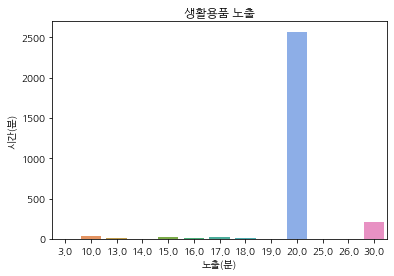

In [284]:
fig, ax = plt.subplots()
sns.countplot(x='노출(분)', data=household)
plt.title('생활용품 노출')
plt.ylabel('시간(분)')
plt.show()

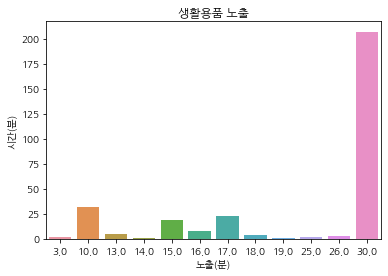

In [285]:
#가장 많은 20분 제외하고 그래프 다시 그려보기
fig, ax = plt.subplots()
sns.countplot(x='노출(분)', data=household[household['노출(분)'] != 20])
plt.title('생활용품 노출')
plt.ylabel('시간(분)')
plt.show()

In [286]:
#3) 마더코드
household.groupby('마더코드').size().sort_values(ascending=False)

마더코드
100372    639
100182    348
100501    284
100763    184
100635    135
         ... 
100409      3
100239      3
100328      3
100024      3
100433      2
Length: 76, dtype: int64

In [287]:
#가장 많은 마더코드 top 5
top5 = household.groupby('마더코드').size().sort_values(ascending=False)[:5].reset_index()['마더코드']
household[household['마더코드'].isin(top5)]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량
230,2019-01-03 20:00:00,20.0,100501,201514,노비타 스마트 비데,생활용품,189000,41183000.0,217.899471
231,2019-01-03 20:20:00,20.0,100501,201514,노비타 스마트 비데,생활용품,189000,83995000.0,444.417989
232,2019-01-03 20:40:00,20.0,100501,201514,노비타 스마트 비데,생활용품,189000,107418000.0,568.349206
499,2019-01-06 19:00:00,20.0,100501,201514,노비타 스마트 비데,생활용품,189000,26320000.0,139.259259
500,2019-01-06 19:20:00,20.0,100501,201514,노비타 스마트 비데,생활용품,189000,60796000.0,321.671958
...,...,...,...,...,...,...,...,...,...
38278,2019-12-31 20:40:00,20.0,100501,201517,일시불 1+1 국내제조 노비타 뉴스파 비데 무료설치,생활용품,418000,6379000.0,15.260766
38279,2019-12-31 21:00:00,20.0,100501,201516,무이자 국내제조 노비타 뉴스파 비데 무료설치,생활용품,239000,19504000.0,81.606695
38280,2019-12-31 21:00:00,20.0,100501,201518,일시불 국내제조 노비타 뉴스파 비데 무료설치,생활용품,219000,61370000.0,280.228311
38281,2019-12-31 21:00:00,20.0,100501,201515,무이자 1+1 국내제조 노비타 뉴스파 비데 무료설치,생활용품,458000,6781000.0,14.805677


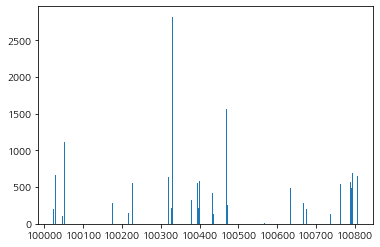

In [288]:
fig, ax = plt.subplots()
plt.bar(household['마더코드'], household['판매량'])
plt.show()

In [289]:
#4) 상품코드
pass

In [290]:
#5) 상품명
#5-1) 브랜드
#5-2) 세트 or Not
#5-3) 노출빈도

#### 상품명 전처리 아이디어
- 브랜드
    - 특수문자
        - 일) -> (공백)
        - ()이나 [] 같은 특수 문자를 공백으로 만들기
  
     - 상품명이 먼저 등장하는 경우
         - KF94, 대형, ...
- 세트 or Not
    - 1+1, 세트 등의 단어 포함된 것들
    - 동시에 판 것들
- 노출빈도
    - Count함수

In [ ]:
#5-1) 브랜드

In [291]:
#텍스트에 포함되어 있는 특수 문자를 공백으로 바꾸기
def cleanText(readData):
    text = re.sub('[-=,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', readData) # '+'는 그대로 놔두기
    return text

#test
cleanText('가)세렌셉템버 다이아 체크 리빙박스+압축팩') #test /'+'는 그대로 놔두기

'가 세렌셉템버 다이아 체크 리빙박스+압축팩'

In [292]:
#브랜드 띄어쓰기 교정
#까사마루, 올바로, ... 
def makeSpaceBrand(brand, data):
    new_brand = []
    for b in brand:
        b_with_space = ' ' + b + ' '
        tmp = data.replace(b, b_with_space)
        
        if b in tmp.split():
            new_brand.append(b)
            break
        else:
            new_brand.append(data)
            break          
    return new_brand

In [293]:
#test
print(makeSpaceBrand(['까사마루', '올바로', '보국'],'가까사마루행거 2단'))
print(makeSpaceBrand(['까사마루', '올바로', '보국'],'까사마행거 2단'))

['까사마루']
['까사마행거 2단']


In [294]:
household_brand = []
exception = ['가','무이자', '일시불', '국내산', '김병만의', '김병지', '완벽더블구성', '기본구성', '파격가', '일','무',
            '2019년', 'D', 'ALL', 'New', '1세트','2세트','5세트', '국내제작', '중형','점보특대형','점보형',
            '퀸+퀸','킹+싱글','퀸+싱글','킹사이즈','퀸사이즈','싱글사이즈', '더블+더블','더블+싱글','더블사이즈','싱글사이즈',
            '초특가', '1+1', '풀패키지','실속패키지', '국내제조','한세트','붙이는', 'KF94'] #추가하기..
brand_to_check = ['까사마루', '올바로', '엔웰스']

#3D매쉬 -> '두씽'으로 브랜드 바꿔줘야함
#파워스윙 -> '스윙'으로 브랜드 바꿔줘야함
#1+1보국미니히터(화이트+레드)BKH-1083P +BKH-1083PR -> '보국'을 꺼내야함
#OK 근육통완화 동전패치 -> '케이원헬스케어'
#

for line in household['상품명']:
    line = makeSpaceBrand(brand_to_check, line) #브랜드 띄어쓰기 교정
    line = cleanText(str(line)) #str 변환 후, 특수문자 제거
    tmp = line.split()
    if tmp[0] not in exception:
        household_brand.append(tmp[0])
    elif tmp[1] not in exception:
        household_brand.append(tmp[1])
    elif tmp[2] not in exception:
        household_brand.append(tmp[2])
    else:
        household_brand.append(tmp[3])

print(set(household_brand))
print('\n', len(set(household_brand)), "개의 생활용품 브랜드가 있다.")

{'바로톡', '루미테라피', '벨라홈', '파로마', '코튼데이', '올바로', '바로바로', '자미코코', '밸런스파워', '배관청소용품', '이지스', '센스하우스', '한일', '거미손', '수련', '스피드랙', '굿프렌드', '킹스스파', '바두기', '고밀도', '퀸메이드', '대형', '1+1보국미니히터', '보국미니히터', '센스톰알파청소기', '스위스밀리터리', '페르소나', '코지마', '따스림', '씨엔지코리아', '사운드룩', '정글피싱', '메디쉴드', '메디컬드림', '도루코', '캐치온', '엑사이더', '얼리젼', '싱글+싱글', '크린조이', '까사마루', '타이거', '달인', '블루콤', '대웅모닝컴', '니봇', '트라이', '센티멘탈', '점보', '테팔', '스팀큐다리미', '스칸디나비아', '노송가구', '12', '선일금고', '디비노', '파워스윙', '코이모', '올바로바른자세밴드', '올뉴', '브람스안마의자', '일월', '발렌티노루디', '모리츠', '레스트업', '노비타', '특대', '히팅맘', 'LG생활건강', '세렌셉템버', '엔웰스황사방역마스크', '중외신약', '3D매쉬', 'OK'}

 74 개의 생활용품 브랜드가 있다.


In [328]:
#5-2) 세트 or Not
setOrNot = ['세트' ,'+']
for line in household['상품명'][:5]:
    for a in setOrNot:
        print(a in line)

True
False
True
False
True
False
False
False
False
False


In [295]:
#6) 판매단가
household['판매단가'].sort_values()

24227      12800
24224      12800
24221      12800
36296      19900
37883      19900
          ...   
25685    1980000
25687    1980000
25689    1980000
24864    1980000
24862    1980000
Name: 판매단가, Length: 2877, dtype: int64

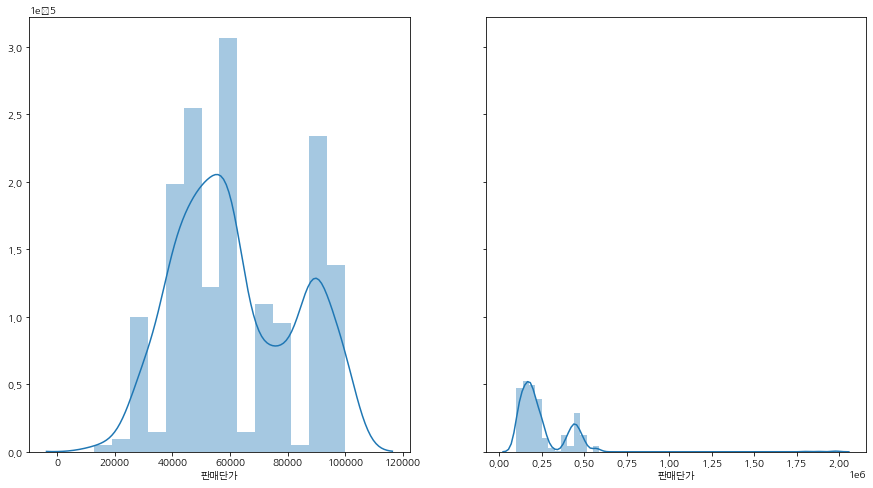

In [296]:
fig, axes = plt.subplots(1,2, figsize=(15,8), sharey=True)
sns.distplot(household['판매단가'][household['판매단가'] < 100000], ax=axes[0])
sns.distplot(household['판매단가'][household['판매단가'] >= 100000], ax=axes[1])
plt.show()

In [297]:
#7) 취급액
household['취급액'].sort_values()

23427            0.0
5982             0.0
5983             0.0
5987             0.0
5990             0.0
            ...     
35127    100506000.0
33108    102562000.0
3449     103963000.0
232      107418000.0
501      112361000.0
Name: 취급액, Length: 2877, dtype: float64

In [300]:
household['취급액'][household['취급액']==0].count()

106

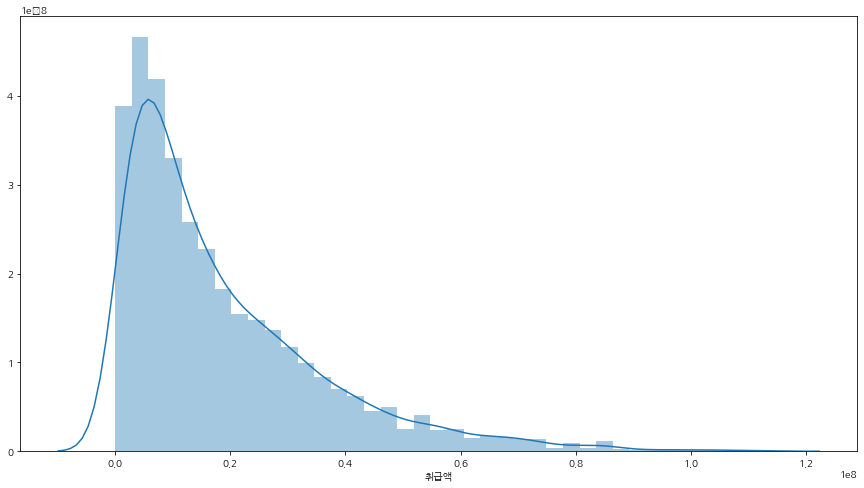

In [302]:
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(household['취급액'][household['취급액']!=0])
plt.show()

In [303]:
#8) 판매량
household['판매량'].sort_values()

8241        0.000000
13364       0.000000
13365       0.000000
24115       0.000000
4508        0.000000
            ...     
29932    2108.774510
37158    2215.275081
36469    2281.585761
6299     2420.150376
37159    2820.517799
Name: 판매량, Length: 2877, dtype: float64

In [304]:
household['판매량'][household['판매량']==0].count()

106

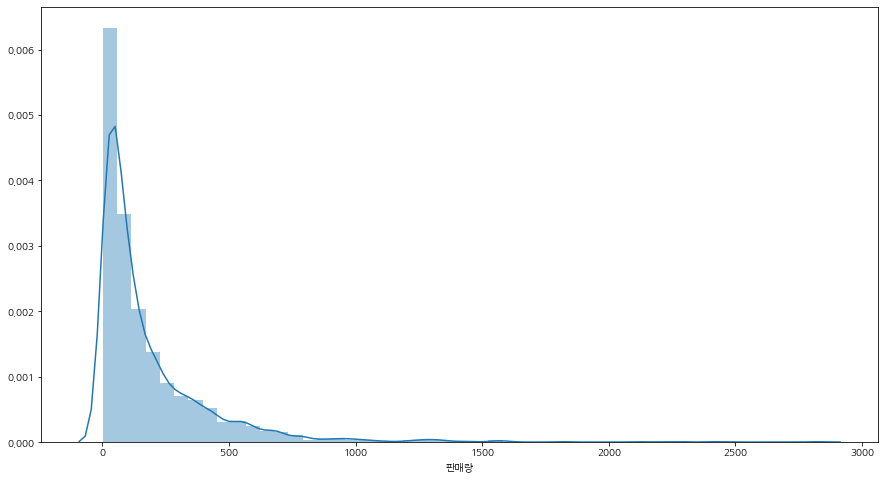

In [305]:
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(household['판매량'][household['판매량']!=0])
plt.show()

#### 2) 가구

In [331]:
#1) 방송일시
pass

In [ ]:
#2) 노출(분)
furniture

In [ ]:
#3) 마더코드
#4) 상품코드
#5) 상품명
#6) 판매단가
#7) 취급액
#8) 판매량

### 4. 변수 선택 및 모델 구축
#### Feature Engineering & Initial Modeling

### 5. 모델 학습 및 검증
#### Model Tuning & Evaluation